# Linear regression

Regression : These algo. are used if there is relation between input and output. or the values are continuous.
classification :- It is used for prediction of categorical variables . ex:- weather forecast, price prediction.

It is also supervised technique. which is used to predict categorical values. ex. spam/not spam, costumer come again or not.
1. logistic regression
2. decision trees
3. naive bayes algorithm

anomaly detection:- it is a pattern in  data that does not confirm to expected behaviour . these are the instances where data points deviate significantly from the normal 
behaviour.

machine learning flow :- Input data -> Data preprocessing(data cleaning , data transformation) -> Train and Validation -> Model raining -> model evaluation -> deployment.

co relation :- if one feature increase other also increase called positive co relation.
               if one feature increase and other decrease the it is called negative co relation.

Linear regression :- assumptions :- 1.> relationship b/w independent and dependent variable should be linear
.2. Homoscedasticity = this states variance of error is constant across all independent variables(errors sab independent variables le liye same or in a particular range)
3. normality of error :- the errors of the model should be normally distributed.(errors value will follow bell curve or normally distributed)
4. no auto co relation :- jo bhi error hai unke bich me co relation nhi hona chaiye.
5.> multi co linearity :- independent variables should not be co related to each other.



In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [166]:
df = pd.read_csv("exploring_dataset.csv")

In [167]:
df.head()

,age,shoe_size,price(£),sex
0,3,27,4,m
1,4,27,4,m
2,5,28,5,m
3,6,29,5,f
4,7,29,6,f


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1000 non-null   int64 
 1   shoe_size  1000 non-null   int64 
 2   price(£)   1000 non-null   int64 
 3   sex        1000 non-null   object
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [169]:
df.head()

,age,shoe_size,price(£),sex
0,3,27,4,m
1,4,27,4,m
2,5,28,5,m
3,6,29,5,f
4,7,29,6,f


In [170]:
df.nunique()

age          13
shoe_size     8
price(£)     11
sex           2
dtype: int64

In [171]:
df.isnull().sum()

age          0
shoe_size    0
price(£)     0
sex          0
dtype: int64

Observation – Exploratory Data Analysis (EDA)

.head() provided a quick preview of the dataset.

.info() helped identify data types and check for missing values.

.describe() gave statistical insights like mean, min, max, and standard deviation.

The dataset mainly contains numerical features suitable for regression models.

Text(0.5, 1.0, 'Shoe size prediction')

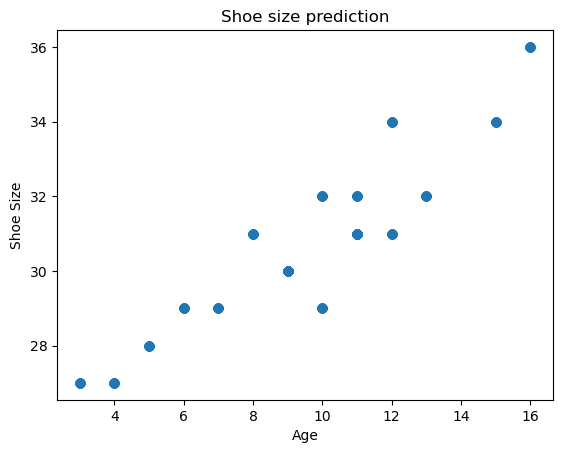

In [172]:
plt.scatter(x="age",y="shoe_size",data=df)
plt.xlabel("Age")
plt.ylabel("Shoe Size")
plt.title("Shoe size prediction")

Observation – Scatter Plot (Age vs Shoe Size)

The scatter plot visualizes the relationship between Age and Shoe Size.

Each point represents an individual's age and corresponding shoe size.

The plot shows a positive trend, indicating that shoe size generally increases with age during early growth years.

The data points follow a roughly linear pattern, suggesting that Linear Regression is suitable for modeling this relationship.

In [173]:
df.drop("sex",axis=1,inplace=True)

In [174]:
df.head()

,age,shoe_size,price(£)
0,3,27,4
1,4,27,4
2,5,28,5
3,6,29,5
4,7,29,6


In [175]:
x = df.drop(['price(£)'],axis=1)

In [176]:
y = df['price(£)']

In [177]:
x.head()

,age,shoe_size
0,3,27
1,4,27
2,5,28
3,6,29
4,7,29


In [178]:
y.head()

0    4
1    4
2    5
3    5
4    6
Name: price(£), dtype: int64

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [180]:
model = LinearRegression()

In [181]:
model.fit(x_train,y_train)

LinearRegression()

In [182]:
y_pred = model.predict(x_test)

In [183]:
error = mean_absolute_error(y_test,y_pred)

In [184]:
error

1.3923294540592372

In [185]:
error2 = mean_squared_error(y_test,y_pred)

In [186]:
error2

3.8376923490819697

In [187]:
 df = pd.read_csv("exploring_dataset.csv")

In [188]:
df.head()

,age,shoe_size,price(£),sex
0,3,27,4,m
1,4,27,4,m
2,5,28,5,m
3,6,29,5,f
4,7,29,6,f


In [189]:
x = df.iloc[:,[0]].values

In [190]:
y = df.shoe_size.values.reshape(-1,1)

In [191]:
model.fit(x,y)

LinearRegression()

In [192]:
y_pred = model.predict(x)

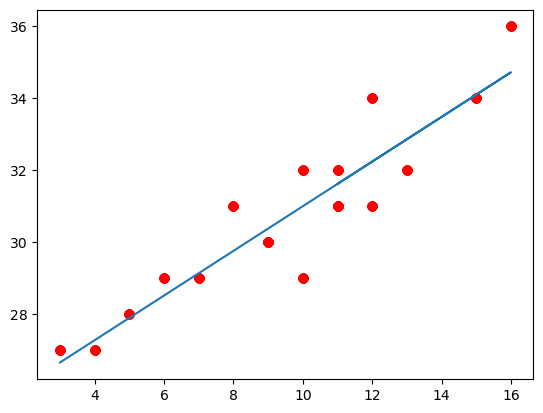

In [194]:
plt.scatter(x,y,color = "red")
plt.plot(x,y_pred)

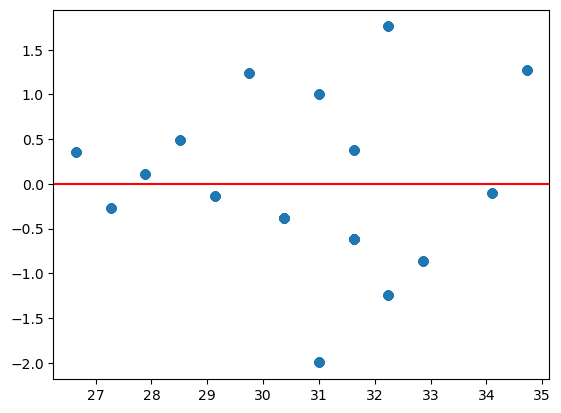

In [195]:
residual = y - y_pred
plt.scatter(y_pred,residual)
plt.axhline(y=0,color="red")

<Axes: ylabel='Count'>

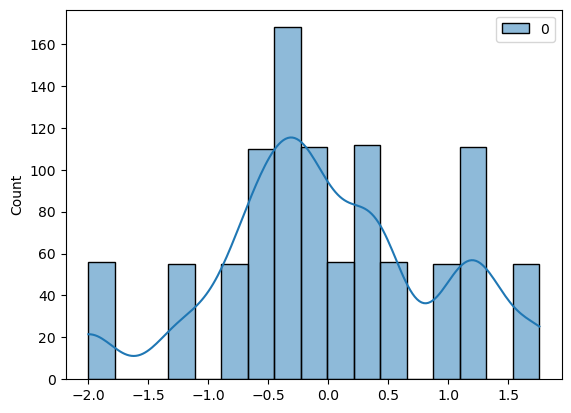

In [196]:
sns.histplot(residual,kde=True)

# Logistic Regression

It is a supevised ml algo. that accomplishes binary classification task by predicting probability of an outcome. we cannot have best fit line in logistic regression because we have only two classes(0 or 1) and we cannot handle categorical dependent variables. errors would be too high and it will pass only through selected number of data points.

Confusion matrix:-(used to check accuracy(these are evaluation matrices of classification problems))
True Positive :- predicted value is positive and actual is also positive
false postive :- predicted is positive but actual is false
false negative :- predicted is negative but actual is positive
true  negative :- predicted is negative but actual is also false

false positive are called type1 error and false negative are type 2 errors

1.> Accuracy :- It is one of the important matrices for evaluating classification models it measures proportion of correctly predicted observations to the total observations.(accuracy = TP+Tn/(tp+tn+fp+fn)).it can me misleading in cases when there is class imbalance.
2.> precision :- It is a matrix that evaluates the accuracy of positive prediction made by classification model.(precision = TP/(tp+fp)).it focus on indicating how many predicted positive are truely positive.It is important in secnereo where false positive are costly or undesirable.such as medical dygnosis and fraud detection.
Recall :- it is also called sensitivity or true positive rate. It is proportion of actual positives that are correctly identified by models.(recall = tp/(tp+fn)).recall empthasizes the model ability to capture all positive instances in the dataset.it is critical in situations where missing positive cases have significant conquenses such an anomaly detection.

F1-Score = It is harmonic mean of precision and recall (2xprecsion*recall/(precsion+recall)) .f1 score is more balanced matric then accuracy specially in cases of imbalanced dataset.it is harmonic mean of precision and recall giving equal weight to both false positive and false negative.

Key assumption for logistic regression implementation:-
1> dependent variable should be binary.
2> it requires sufficiently large sample size.
3> no extreme outliers. if there are outlier exist in dataset then we have to implement. one of the following solution:-

i.> Eliminate or remove the outlier.

ii.>Consider value of mean or median instead of outlier value.(moostly median because outlier deviate mean tooo much)

4.> Independent Observations :- dataset observations should be independent of each other. observation should not be related to each other.

 5.> no multi co-linearlity between predictor variables.It implies that predictor variables should be independent of each other.

Imbalance data:- It is datasets where distribution of observation in target class is uneven. or we can say one class label has significantly has higher number of observations as compare to other.

Problems with the imbalance dataset:- a model may appear to have high accuracy in situations if it primarily predicts the majority class.

Minority class obervations looks like noice to the model and may be ignored by the model

In [8]:
import pandas as pd
from sklearn.utils import resample
from sklearn.datasets import make_classification

In [212]:
x,y = make_classification(n_samples = 1000,n_classes = 2, n_features = 4,weights = [.95,.05],random_state = 42)

In [213]:
df = pd.DataFrame(x,columns = ['a','b','c','d'])

In [214]:
df.head()

,a,b,c,d
0,-1.194848,1.138331,-1.482079,1.025358
1,0.290131,0.317681,-0.996519,0.477009
2,-0.522737,-0.121434,0.765888,-0.308384
3,1.738138,-0.188065,-1.195371,0.302161
4,1.828884,-0.289261,-1.049151,0.206271


In [215]:
df['class'] = y

In [216]:
df.head()

,a,b,c,d,class
0,-1.194848,1.138331,-1.482079,1.025358,0
1,0.290131,0.317681,-0.996519,0.477009,0
2,-0.522737,-0.121434,0.765888,-0.308384,0
3,1.738138,-0.188065,-1.195371,0.302161,0
4,1.828884,-0.289261,-1.049151,0.206271,0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1000 non-null   float64
 1   b       1000 non-null   float64
 2   c       1000 non-null   float64
 3   d       1000 non-null   float64
 4   class   1000 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 35.3 KB


In [218]:
df['class'].value_counts()

class
0    945
1     55
Name: count, dtype: int64

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [221]:
model = LogisticRegression()

In [222]:
model.fit(x_train,y_train)

LogisticRegression()

In [223]:
y_pred  = model.predict(x_test)

In [224]:
accuracy = accuracy_score(y_pred,y_test)

In [225]:
print(accuracy)

0.945


In [226]:
precision = precision_score(y_pred,y_test)
recall = recall_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)

In [227]:
print("precision:-",precision,"recall:-",recall,"f1_score:-",f1)

precision:- 0.21428571428571427 recall:- 1.0 f1_score:- 0.35294117647058826


# Balancing Techniques

Now we will balance dataset

1.> Class weights :- it is a technique of balancing the dataset by assigning different weights to classes during model training to address the imbalance this technique is useful with certain algo. like logistic regression,decision trees etc...
The idea behind class weights is to penalize misclassification of minority class more heavily and encouraging to model to pay more attention to correctly predicting minority class instances.


In [230]:
x_train_cw,x_test_cw,y_train_cw,y_test_cw = train_test_split(x,y,test_size=0.2,random_state = 42)

In [231]:
import numpy as np

In [232]:
def cal_class_weights(y_train):
    y_train = np.asarray(y_train).ravel()   

    unique_classes, class_counts = np.unique(y_train, return_counts=True)
    total_samples = len(y_train)

    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (len(unique_classes) * class_count)
        class_weights[int(class_label)] = float(class_weight)

    return class_weights
class_weights = cal_class_weights(y_train_cw)
print(class_weights)

{0: 0.5270092226613966, 1: 9.75609756097561}


In [233]:
model_weight = LogisticRegression(class_weight = class_weights)

In [234]:
model_weight.fit(x_train_cw,y_train_cw)

LogisticRegression(class_weight={0: 0.5270092226613966, 1: 9.75609756097561})

In [235]:
y_pred_weighted = model_weight.predict(x_test_cw)

In [236]:
accuracy_weighted = accuracy_score(y_test_cw,y_pred_weighted)
precision_weighted = precision_score(y_test_cw,y_pred_weighted)
recall_weighted = recall_score(y_test_cw,y_pred_weighted)
f1_score_weighted = f1_score(y_test_cw,y_pred_weighted)

print("Accuracy :- ",accuracy_weighted,"precision:-",precision_weighted,"recall_score:-",recall_weighted,"f1_score:-",f1_score_weighted)

Accuracy :-  0.895 precision:- 0.37037037037037035 recall_score:- 0.7142857142857143 f1_score:- 0.4878048780487805


In [237]:
# model_weight.fit(x_train_cw,y_train_cw)
print(len(x_train_cw))
print(len(y_train_cw))

800
800


2.> Random_undersampling :- under sampling is defined as a removing some observation from some majority class. This is done till both the classes aere balancedout. 
Advantages:-
1. Computational efficient
2. simplicity
Disadvantages:-
1. loss of information
2. risk of overfitting


In [239]:
from imblearn.under_sampling import RandomUnderSampler


In [240]:
t = [x for x in y if x==0]

In [241]:
len(t)

945

In [242]:
s = [x for x in y if x == 1]

In [243]:
len(s)

55

In [244]:
under_sample = RandomUnderSampler(random_state = 42,replacement = True)

In [245]:
x_under_sample,y_under_sample = under_sample.fit_resample(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [246]:
t = [x for x in y_under_sample if x==0]
len(t)

55

In [247]:
s = [x for x in y_under_sample if x == 1]
len(s)

55

In [248]:
x_train_ru,x_test_ru,y_train_ru,y_test_ru = train_test_split(x_under_sample,y_under_sample,test_size=0.2,random_state = 42)

In [249]:
model_random_us = LogisticRegression()

In [250]:
model_random_us.fit(x_train_ru,y_train_ru)

LogisticRegression()

In [251]:
y_pred_ru = model_random_us.predict(x_test_ru)

In [252]:
accuracy_ru = accuracy_score(y_test_ru,y_pred_ru)
precision_ru = precision_score(y_test_ru,y_pred_ru)
recall_ru = recall_score(y_test_ru,y_pred_ru)
f1_score_ru = f1_score(y_test_ru,y_pred_ru)
print("accuracy_score:-",accuracy_ru,"precision_score:-",precision_ru,"recall_score:-",recall_ru," f1_score",f1_score_ru)

accuracy_score:- 0.6818181818181818 precision_score:- 0.7272727272727273 recall_score:- 0.6666666666666666  f1_score 0.6956521739130435


3.) Random_over Sampling :- in random over sampling technique class imbalance is handled by increasing the size of minority class by doing sampling with replacement untill class distribution is balanced.
advantages:- 
1. no loss of data
2. no risk of overfitting.


In [254]:
from imblearn.over_sampling import RandomOverSampler

In [255]:
Over_sample = RandomOverSampler(random_state = 42)

In [256]:
x_over,y_over = Over_sample.fit_resample(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [257]:
a = [a for a in y_over if a == 0]
len(a)

945

In [258]:
b = [b for b in y_over if b == 1]
len(b)

945

In [259]:
model = LogisticRegression()

In [260]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.2,random_state = 42)

In [261]:
model.fit(x_train,y_train)

LogisticRegression()

In [262]:
y_pred = model.predict(x_test)

In [263]:
accuracy_over = accuracy_score(y_test,y_pred)
precision_over = precision_score(y_test,y_pred)
recall_over = recall_score(y_test,y_pred)
f1_score_over = recall_score(y_test,y_pred)
print("accuracy_score:-",accuracy_over,"precision_score:-",precision_over,"recall_score:-",recall_over," f1_score",f1_score_over)

accuracy_score:- 0.8095238095238095 precision_score:- 0.8650306748466258 recall_score:- 0.7382198952879581  f1_score 0.7382198952879581


4.) Synthetic minority oversampling technique(Smote):- This is used to generate synthetic samples for minority class.This technique works by randomly choosing a sample from minority class and data mining nearest neighbour for the sample , then artifically sample is added between selected sample and its neighbours.(default value  = 5 for nearest neighbours)

Working of smote algo.:-
1. identify minority class instances.
2. select random minority class datapoint from the dataset.
3. Find nearest neighbour.
4. generate synthetic samples.

In [265]:
q = [x for x in y if x == 0]
w = [a for a in y if a == 1]
print(len(q))
print(len(w))

945
55


In [351]:
from imblearn.over_sampling import SMOTE

In [353]:
smote = SMOTE(random_state = 42)

In [355]:
x_smote,y_smote = smote.fit_resample(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [357]:
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(x_smote,y_smote,test_size = 0.2,random_state = 42)

In [359]:
model_smote = LogisticRegression()

In [361]:
model_smote.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [363]:
y_pred_smote = model_smote.predict(x_test_smote)

In [365]:
accuracy_smote = accuracy_score(y_test_smote,y_pred_smote)
precision_smote = precision_score(y_test_smote,y_pred_smote)
recall_smote = recall_score(y_test_smote,y_pred_smote)
f1_score_smote = recall_score(y_test_smote,y_pred_smote)
print("accuracy_score:-",accuracy_smote,"precision_score:-",precision_smote,"recall_score:-",recall_smote," f1_score",f1_score_smote)

accuracy_score:- 0.8333333333333334 precision_score:- 0.8764705882352941 recall_score:- 0.7801047120418848  f1_score 0.7801047120418848


In [367]:
import matplotlib.pyplot as plt

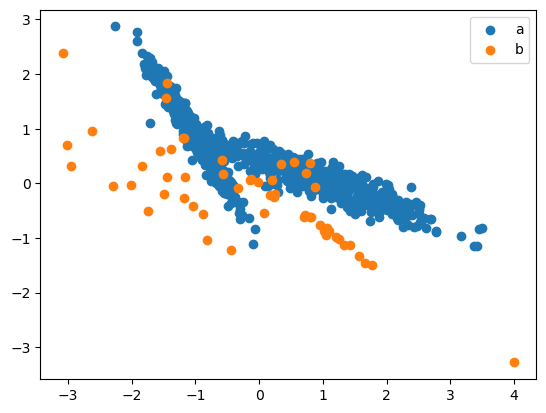

In [385]:
plt.scatter(x[y==0][:,0],x[y==0][:,1],label = "a")
plt.scatter(x[y==1][:,0],x[y==1][:,1],label ="b")
plt.legend()

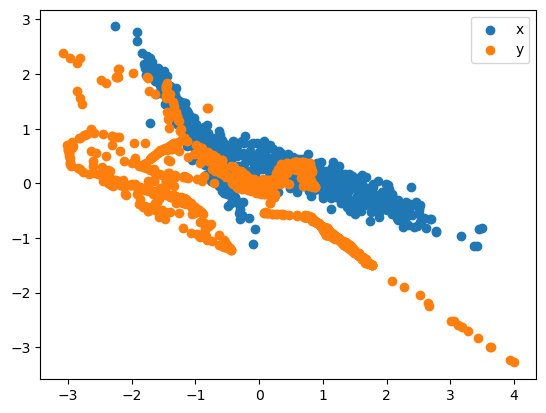

In [393]:
plt.scatter(x_smote[y_smote == 0][:,0],x_smote[y_smote == 0][:,1],label = "x")
plt.scatter(x_smote[y_smote == 1][:,0],x_smote[y_smote == 1][:,1],label = "y")
plt.legend()